In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the datasets and first inspection.

observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

df_observations = observations.copy()
df_species = species.copy()

print('Observations:\n', df_observations.head())
print('Species:\n', df_species.head())

Observations:
             scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
Species:
   category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Au

# PROJECT GOALS:
# Perform data analysis on the conservation statuses of the species and investigate if there are any patterns or themes to the types of species that become endangered

### Definitions for Endangered and Threatened species:

Under the Endangered Species Act (ESA), plant and animal species may be listed as either endangered or threatened. “Endangered” means a species is in danger of extinction throughout all or a significant portion of its range. “Threatened” means a species is likely to become endangered within the foreseeable future.

## EDA of the datasets

Observations:
          scientific_name                            park_name  observations
count              23296                                23296  23296.000000
unique              5541                                    4           NaN
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN
freq                  12                                 5824           NaN
mean                 NaN                                  NaN    142.287904
std                  NaN                                  NaN     69.890532
min                  NaN                                  NaN      9.000000
25%                  NaN                                  NaN     86.000000
50%                  NaN                                  NaN    124.000000
75%                  NaN                                  NaN    195.000000
max                  NaN                                  NaN    321.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 232

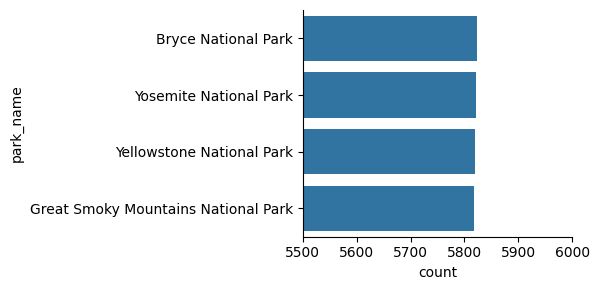

% Proportion of park_name values:
 park_name
Bryce National Park                    25.011812
Yosemite National Park                 25.003222
Yellowstone National Park              24.994631
Great Smoky Mountains National Park    24.990335
Name: count, dtype: float64


In [3]:
# Proceed with EDA on df_observations

print('Observations:\n', df_observations.describe(include='all'))
print(df_observations.info())

# Column dtypes are correct. There seems not to be missing data upon first inspection. 
# The 'observations' column seems to have a skew-left distribution. 
# Also, the 'park_name' column seems to be eavenly distributed judging by the freq of the top value and the amount of
# unique values.

print('\nChecking for duplicates:\n', df_observations.duplicated().value_counts())
print(df_observations[df_observations.duplicated() == True])
# 15 duplicated rows found, keeping the most recent observations.

df_observations = df_observations.drop_duplicates(keep='last')
print('\nNew df_observations len:', len(df_observations))


# Checking the distribution of the 'park_name' column.
sns.catplot(df_observations.park_name, kind='count', order=df_observations.park_name.value_counts().index, height=3, aspect=2)
plt.xlim((5500,6000))
plt.show()

print('% Proportion of park_name values:\n', 100*(df_observations.park_name.value_counts()/len(df_observations.park_name)))
# It is fair to assume that the data-collection was aimed with the same amount of observations for each park.

Species:
               category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None

Checking for duplicates:
 Empty DataFrame
Columns: [category, scientifi

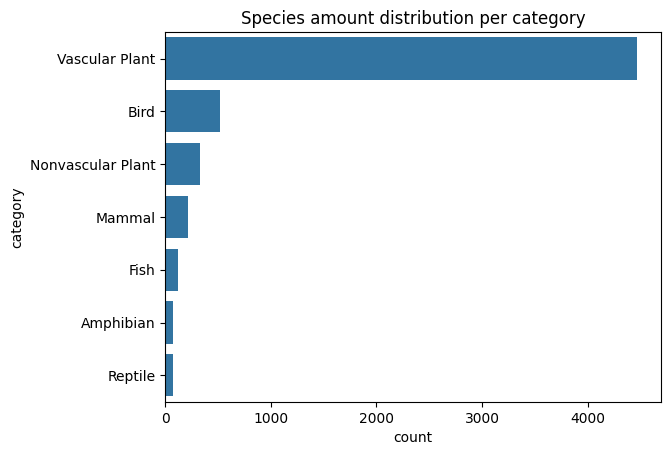


Amount of species that face some kind of danger:
 conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


In [4]:
# Proceed with EDA on df_species

print('Species:\n', df_species.describe(include='all'))
print(df_species.info())

# Column dtypes are correct. The mayority of 'conservation_status' values are missing, but we could suspect that 
# NaN values indicate a base/regular value of "safe" or "unthreatened". 
# The 'category' column seems to be dominated by the 'Vascular Plant' value, and the 'scientific_name' and 'common_names' columns
# seem to be almost fully heterogeneous.

print('\nChecking for duplicates:\n', df_species[df_species.duplicated() == True])
# No duplicates found.


# Checking the distribution amounts of the 'category' column.
sns.countplot(df_species.category, order=df_species.category.value_counts().index)
plt.title('Species amount distribution per category')
plt.show()
# The 'Vascular Plant' value dominates the species landscape.

# Checking the different values of the 'conservation_status' column.
print('\nAmount of species that face some kind of danger:\n', df_species.conservation_status.value_counts())

## Data Wrangling

In [5]:
# Merging both datasets to complete each species' name observed with it's information from df_species

df_total = df_observations.merge(df_species, how='left', on='scientific_name')
print('Len of df_observations: ',len(df_observations))
print('Len of df_total: ',len(df_total))


Len of df_observations:  23281
Len of df_total:  25601


In [6]:
# When trying to merge both dataframes, I notice the amount of rows increases as a result, there could be duplicated
# species within the df_species dataframe.

print(df_species[df_species.scientific_name.duplicated() == True])
print(df_species[df_species.scientific_name == 'Panicum rigidulum var. rigidulum'])
print(df_species[df_species.scientific_name == 'Puma concolor'])
print(df_species[df_species.scientific_name == 'Canis lupus'])
# It seems the species entries were duplicated as a result of registering updated information on those species.

            category                   scientific_name  \
3017          Mammal                    Cervus elaphus   
3019          Mammal            Odocoileus virginianus   
3020          Mammal                       Canis lupus   
3022          Mammal                     Puma concolor   
3025          Mammal                  Lutra canadensis   
...              ...                               ...   
5619  Vascular Plant  Panicum rigidulum var. rigidulum   
5638  Vascular Plant                    Setaria pumila   
5640  Vascular Plant                  Vulpia bromoides   
5643  Vascular Plant                     Vulpia myuros   
5750  Vascular Plant                   Rosa eglanteria   

                                           common_names conservation_status  
3017                                 Rocky Mountain Elk                 NaN  
3019               White-Tailed Deer, White-Tailed Deer                 NaN  
3020                                    Gray Wolf, Wolf         In Re

In [7]:
# We will keep the last entries for those duplicates, and re-merge the df_total dataframe.
print('Len of df_total with duplicate entries:', len(df_species))
df_species = df_species.drop_duplicates(subset='scientific_name', keep='last')
print('Len of df_total without duplicate entries:', len(df_species))

Len of df_total with duplicate entries: 5824
Len of df_total without duplicate entries: 5541


In [8]:
print('Previous df_total len:\n',len(df_total))
df_total = df_observations.merge(df_species, how='left', on='scientific_name')
print('Updated df_total len:\n',len(df_total))
print('Original df_observations len:\n',len(df_observations))

print('\nAmount of species that face some kind of danger (updated):\n', df_species.conservation_status.value_counts())
print('Amount of unique species: {}, making the affected ones a {}% of the total.'.format((len(df_species.scientific_name.unique())),round(100*(len(df_species[df_species['conservation_status'].isnull()==False]))/len(df_species.scientific_name.unique()),2)))
df_total.head()
# Let's continue then.

Previous df_total len:
 25601
Updated df_total len:
 23281
Original df_observations len:
 23281

Amount of species that face some kind of danger (updated):
 conservation_status
Species of Concern    151
Endangered             15
Threatened             10
In Recovery             3
Name: count, dtype: int64
Amount of unique species: 5541, making the affected ones a 3.23% of the total.


,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN


## Assesing the data of each National Park

In [9]:
# I will divide a sorted dataframe for each National Park.
park_names_sorted = df_total.park_name.sort_values().unique()
print(park_names_sorted)

df_total_sorted = df_total.sort_values(by=['park_name','category','conservation_status'],ignore_index=True)

df_bryce = df_total_sorted[df_total_sorted.park_name == 'Bryce National Park']
df_great = df_total_sorted[df_total_sorted.park_name == 'Great Smoky Mountains National Park']
df_yellowstone = df_total_sorted[df_total_sorted.park_name == 'Yellowstone National Park']
df_yosemite = df_total_sorted[df_total_sorted.park_name == 'Yosemite National Park']

['Bryce National Park' 'Great Smoky Mountains National Park'
 'Yellowstone National Park' 'Yosemite National Park']


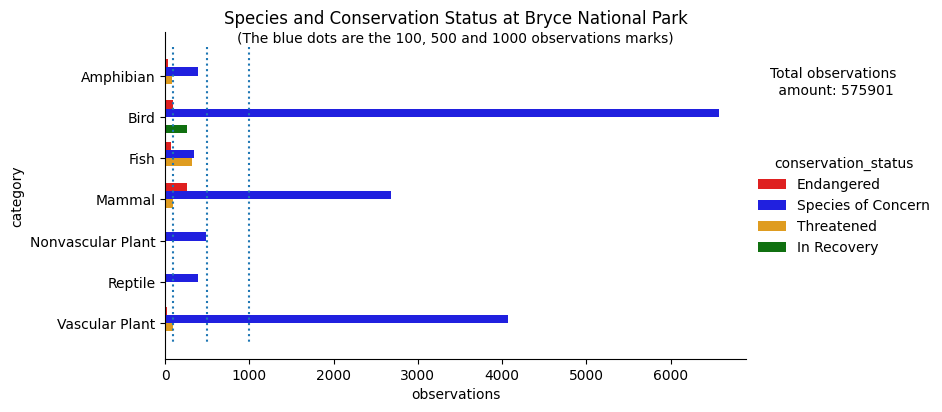

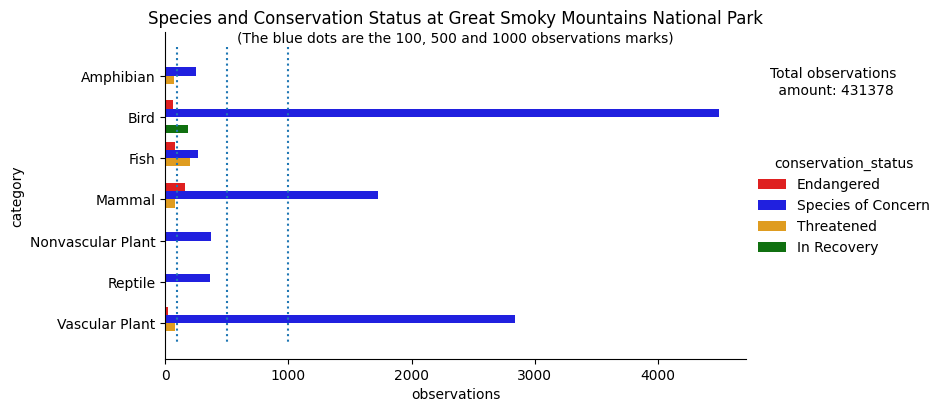

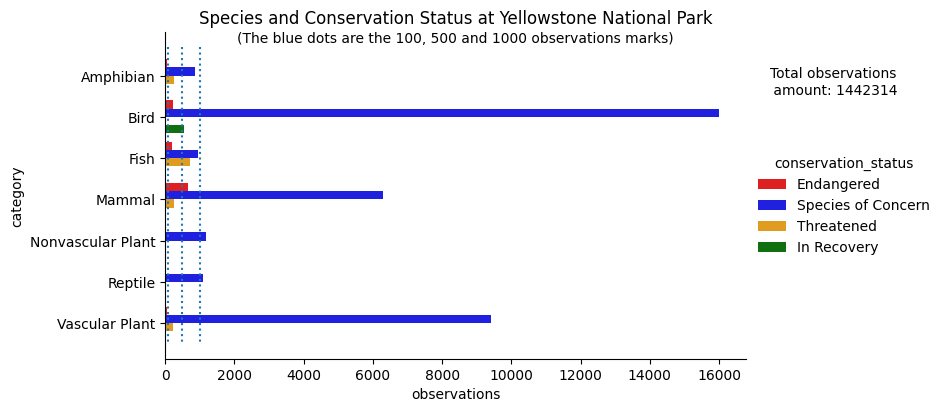

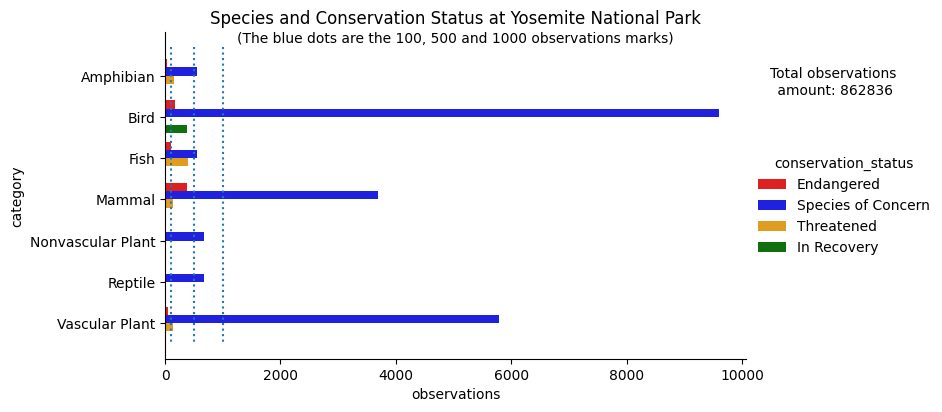

In [10]:
# This way, we can appreciate the amount of observations for each species conservation status and category
# each National Park has.
national_parks = [df_bryce,df_great,df_yellowstone,df_yosemite]

for i in range(len(national_parks)):
    grouped_observations = national_parks[i].groupby(['category', 'conservation_status'])['observations'].sum()
    grouped_observations = grouped_observations.reset_index()
    sns.catplot(data=grouped_observations, kind='bar', y='category', x='observations', hue='conservation_status', height=4, aspect=2, palette=['red' ,'blue', 'orange', 'green'])
    plt.title('Species and Conservation Status at {}'.format(df_total.park_name.sort_values().unique()[i]))
    plt.vlines(x=1000, ymin=-0.7, ymax=6.5, linestyles=':')
    plt.vlines(x=500, ymin=-0.7, ymax=6.5, linestyles=':')
    plt.vlines(x=100, ymin=-0.7, ymax=6.5, linestyles=':')
#     plt.xscale('log')
    plt.annotate('Total observations\n amount: {}'.format(national_parks[i].observations.sum()), xy=(100, -1), xycoords='data', xytext=(1.15, 0.8), textcoords='axes fraction', va='bottom', ha='center')
    plt.annotate('(The blue dots are the 100, 500 and 1000 observations marks)', xy=(100, -1), xycoords='data', xytext=(0.5, 1), textcoords='axes fraction', va='top', ha='center')
    plt.show()

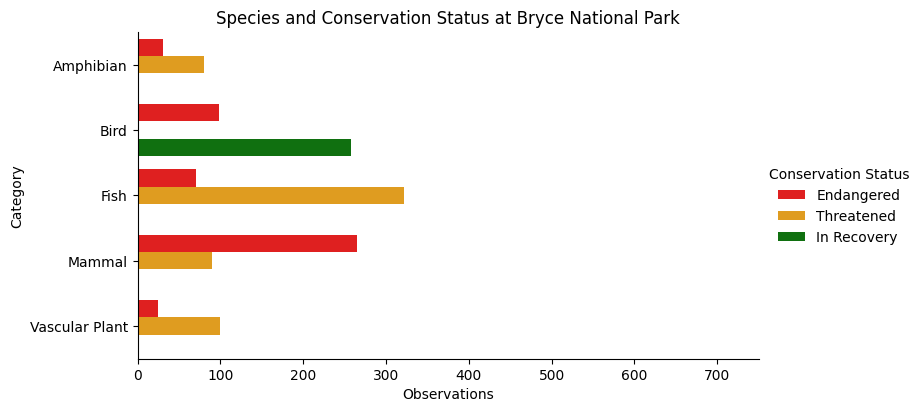

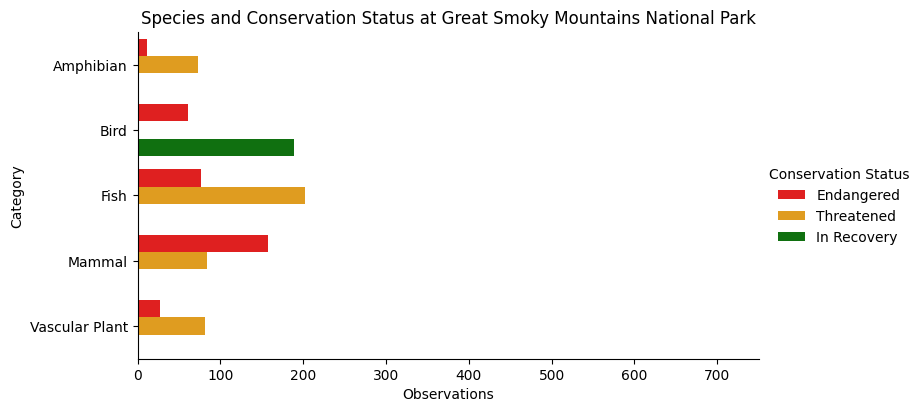

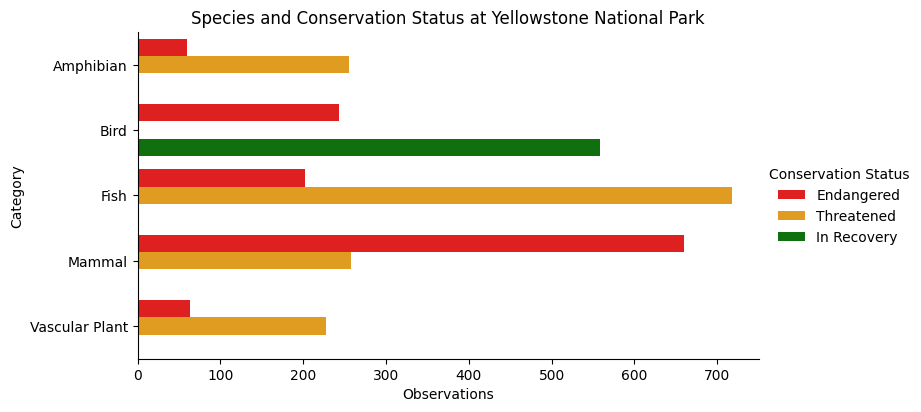

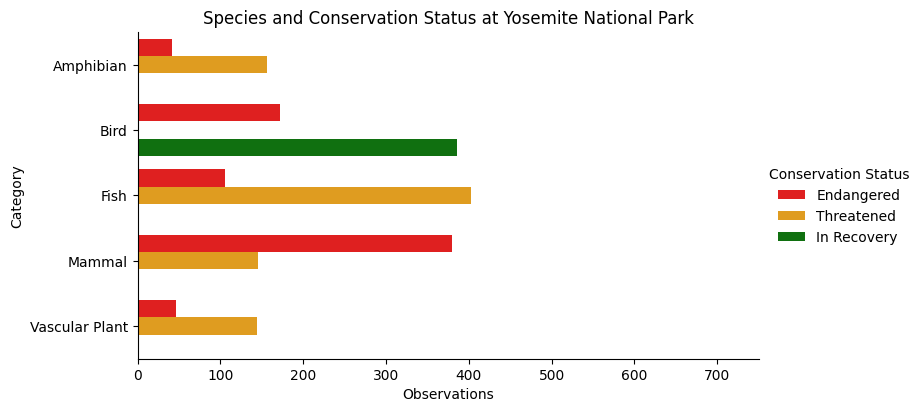

In [11]:
# Seeing that there are a lot of Species of Concern observations obstructing the data with lower counts
# (and plotting a log scale can be harder to understand at first sight, depending on the audience),
# let's plot the previous without the Species of Concern data.

for i in range(len(national_parks)):
    grouped_observations = national_parks[i][national_parks[i]['conservation_status'] != 'Species of Concern'].groupby(['category', 'conservation_status'])['observations'].sum()
    grouped_observations = grouped_observations.reset_index()
    catplot = sns.catplot(data=grouped_observations, kind='bar', y='category', x='observations', hue='conservation_status', height=4, aspect=2, palette=['red', 'orange', 'green'])
    catplot.legend.set_title('Conservation Status')
    plt.title('Species and Conservation Status at {}'.format(df_total.park_name.sort_values().unique()[i]))
    plt.xlabel('Observations')
    plt.ylabel('Category')
    plt.xlim((0, 750))
    plt.show()
    
# We can notice that Yellowstone National Park has a greater volume of observations.

In [12]:
# Finding out the percentage of Endangered species compared to the "safe" or "unthreatened" ones.

for i in range(len(df_total.category.unique())):
    print('Category {}: {} %'.format(df_total.category.unique()[i], round(100*(len(df_total[(df_total['category'] == df_total.category.unique()[i]) & (df_total['conservation_status'] == 'Endangered')]))/(len(df_total[(df_total['category'] == df_total.category.unique()[i]) & (df_total['conservation_status'].isnull())])),4)))
    print(len(df_total[(df_total['category'] == df_total.category.unique()[i]) & (df_total['conservation_status'] == 'Endangered')]), 'out of', len(df_total[(df_total['category'] == df_total.category.unique()[i]) & (df_total['conservation_status'].isnull())]))

Category Vascular Plant: 0.0226 %
4 out of 17683
Category Mammal: 4.5519 %
32 out of 703
Category Bird: 0.9055 %
16 out of 1767
Category Nonvascular Plant: 0.0 %
0 out of 1312
Category Amphibian: 1.3699 %
4 out of 292
Category Reptile: 0.0 %
0 out of 296
Category Fish: 2.6087 %
12 out of 460


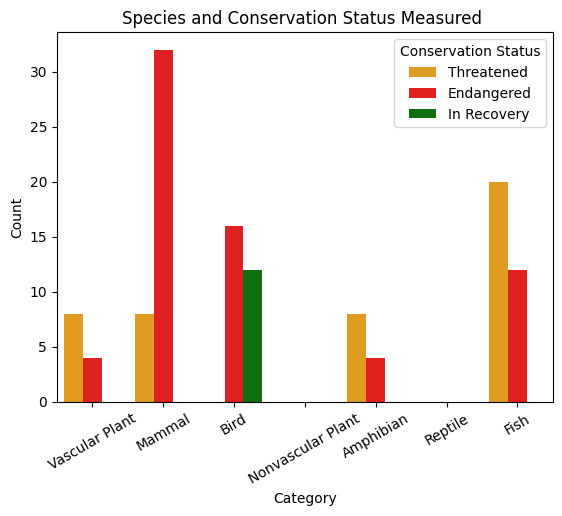

In [13]:
# Let's see if there is any kind of relationship between species and their conservation status in accordance
# to the amount of species registered for each conservation status.

sns.countplot(data=df_total[(df_total['conservation_status'] != 'Species of Concern')], x='category', hue='conservation_status', palette=['orange','red','green'])
plt.title('Species and Conservation Status Measured ')
plt.legend(title='Conservation Status')
plt.ylabel('Count')
plt.xlabel('Category')
plt.tick_params(axis='x', labelrotation=30)
plt.show()

# There is correlation between the category of species and their conservation status. A clear outlier would be the Mammal category,
# as there are substantially more Mammal Endangered species than Threatened ones, the opposite of the trend for the categories.

# The Bird species are another outlier is this plot, as they are the only category with 'In Recovery' species, although they have the second
# highest count of Endangered species, but no Threatened species. This could indicate a success or development in a recovery
# program for Bird species.

In [14]:
# Let's see the proportion of Endangered species against "safe" or "unthreatened" species for each National Park.
# I have grouped all entries of Endangered species per category, per National Park *100
# and divided by all the null entries (presumed to be "safe" or "unthreatened") grouped by species, category, and National Park.
endangered_percentages = []

for i in range(len(park_names_sorted)):
    calculation = 100*df_total[(df_total['conservation_status'] == 'Endangered') & (df_total['park_name'] == park_names_sorted[i])].groupby(['category', 'conservation_status', 'park_name'])['observations'].sum() / df_total[(df_total['conservation_status'].isnull()) & (df_total['park_name'] == park_names_sorted[i])].groupby(['category'])['observations'].sum()
    calculation = calculation.reset_index()
    calculation.rename(columns={'observations':'percentage'}, inplace=True)
    endangered_percentages.append(calculation[['category','park_name','percentage']])
endangered_percentages = pd.concat(endangered_percentages).reset_index().drop('index',axis=1)
    
print('Percentage populations of Endangered species per category and National Park:\n', endangered_percentages)    

Percentage populations of Endangered species per category and National Park:
           category                            park_name  percentage
0        Amphibian                  Bryce National Park    0.450450
1             Bird                  Bryce National Park    0.219136
2             Fish                  Bryce National Park    0.598700
3           Mammal                  Bryce National Park    1.513162
4   Vascular Plant                  Bryce National Park    0.005698
5        Amphibian  Great Smoky Mountains National Park    0.204689
6             Bird  Great Smoky Mountains National Park    0.184921
7             Fish  Great Smoky Mountains National Park    0.889248
8           Mammal  Great Smoky Mountains National Park    1.211285
9   Vascular Plant  Great Smoky Mountains National Park    0.008176
10       Amphibian            Yellowstone National Park    0.328353
11            Bird            Yellowstone National Park    0.220492
12            Fish            Yellowst

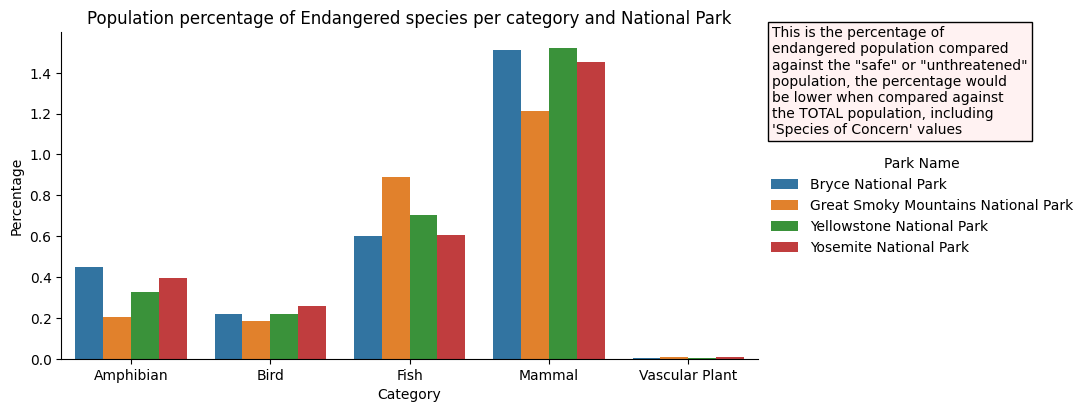

In [15]:
# Now plotting the results as visual data.

catplot = sns.catplot(data=endangered_percentages, kind='bar', x='category', y='percentage', hue='park_name', height=4, aspect=2)
plt.title('Population percentage of Endangered species per category and National Park')
catplot.legend.set_title('Park Name')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.text(4.6,1.1,'''This is the percentage of 
endangered population compared
against the "safe" or "unthreatened"
population, the percentage would 
be lower when compared against
the TOTAL population, including 
\'Species of Concern\' values''', bbox=dict(boxstyle='square', fc=(1, 0.95, 0.95)))
plt.show()

# We can conclude from this plot that the 'park_name' and 'category' variables are somewhat correlated, 
# since the percentage for each Endangered category varies (although not too drastically) depending on the National Park.

# Report and Conclusions

As National Parks, it is clear that plants dominate the landscape, both visually and in the dataset on amount of different species of plants (17867 unique species, with the second highest one being Birds with 2083) and its population.

We begin the analysis with the assumption that the majority of 'conservation_status' values, which are missing, indicate a base/regular value of "safe" or "unthreatened". From there, can see that 3.21% of the species face some kind of conservation danger, with 14 out of 5542 in danger of extinction (highest threat level).

We can also notice that Yellowstone National Park has a higher volume of population with 1,442,314 observations, with Yosemite National Park coming in second with 862,836 observations.


It has been concluded that there is correlation between the category of species and their threat level, not all categories are endangered equally. Most of them have more species Threatened than Endangered, but a clear outlier would be the Mammal category. There are substantially more Mammal Endangered species than Threatened ones (second highest threat level).
The Bird category is another outlier, as they are the only category with species in recovery. Although they have the second
highest count of Endangered species, they have no Threatened species. This could indicate a development or success in a recovery
program for Bird category species.

Moreover, from our analysis we can conclude that the type of National Park and the species category are somewhat correlated, since the percentage for each Endangered species category varies (although not too drastically) depending on the National Park.
This aligns with the concept that each National Park has its own ecosystem, casuistry and development.
Nonetheless, the general trend is that Mammals have the highest rate of Endangered levels throughout all the analysed National Parks, with the second highest one being the Fish species category.

From a total of 5541 unique species in the dataset, the percentage of affected ones is 3.23%. The situation with the Mammals category species raises the greatest concern within this analysis, as the number of Endangered species outweighs the rest of the categories: 4.5519% of their species are Endangered (32 out of 703 unthreatened species). The second highest category being Fish with 2.6087%.

As a closing note, it would be in the interest of everyone to consider and implement recovery plans for said endangered category species, and continue with the conservation and recovery efforts of the species already guarded and under recovery. The analysed National Parks are invaluable ecosystems and must be protected to the best of our human capabilities.

Thank you for reading. All the best,

Daniel Y.

## Bibliography

"Endangered" and "Threated" official definitions: https://www.usgs.gov/faqs/what-are-differences-between-endangered-threatened-imperiled-and-risk-species